In [1]:
import sys
sys.path.append('/home/zhw272/programming/pipeline_utility/in_development/Will')
from cell_extractor.DetectorMetrics import AnnotationProximityTool
from script import get_cell_detections
import pandas as pd
from collections import Counter

In [2]:
cell_detections = get_cell_detections()
for key in cell_detections:
    print(f'{key} has {len(cell_detections[key])} cells')

original_human_positive has 1910 cells
round0_human_negative has 883 cells
round0_human_positive has 352 cells
round0_machine_sure has 12224 cells
round0_machine_unsure has 1420 cells
round1_human_negative has 351 cells
round1_human_positive has 883 cells
round1_machine_sure has 12224 cells
round1_machine_unsure has 1420 cells
round2_machine_sure has 13067 cells
round2_machine_unsure has 1726 cells


In [3]:
annotations_to_prepare = pd.concat([cell_detections[key] for key in ['round0_human_negative','round0_human_positive','round0_machine_sure','round0_machine_unsure']])
tool = AnnotationProximityTool()
tool.pair_distance=5
tool.set_annotations_to_compare(annotations_to_prepare)
tool.find_equivalent_points()
Counter([tuple(i) for i in tool.pair_categories.values()]).most_common()

calculating distance matrix
finding points that are close to each other
grouping and labeling points that are close to each other
before removing duplicates 14879
after removing duplicates 14029


[(('machine_sure',), 12155),
 (('machine_unsure',), 640),
 (('human_negative', 'machine_unsure'), 493),
 (('human_negative',), 384),
 (('human_positive', 'machine_unsure'), 284),
 (('human_positive', 'machine_sure'), 64),
 (('human_negative', 'machine_sure'), 5),
 (('human_positive',), 2),
 (('human_negative', 'human_positive', 'machine_unsure'), 1),
 (('human_positive', 'machine_unsure', 'machine_unsure'), 1)]

In [4]:
annotations_to_prepare = pd.concat([cell_detections[key] for key in ['round1_human_negative','round1_human_positive','round1_machine_sure','round1_machine_unsure']])
tool = AnnotationProximityTool()
tool.pair_distance=5
tool.set_annotations_to_compare(annotations_to_prepare)
tool.find_equivalent_points()
Counter([tuple(i) for i in tool.pair_categories.values()]).most_common()

calculating distance matrix
finding points that are close to each other
grouping and labeling points that are close to each other
before removing duplicates 14878
after removing duplicates 14028


[(('machine_sure',), 12155),
 (('machine_unsure',), 640),
 (('human_positive', 'machine_unsure'), 493),
 (('human_positive',), 384),
 (('human_negative', 'machine_unsure'), 284),
 (('human_negative', 'machine_sure'), 64),
 (('human_positive', 'machine_sure'), 5),
 (('human_negative', 'machine_unsure', 'machine_unsure'), 1),
 (('human_negative',), 1),
 (('human_negative', 'human_positive', 'machine_unsure'), 1)]

In [5]:
annotations_to_prepare = pd.concat([cell_detections[key] for key in ['round1_human_negative','round1_human_positive','round2_machine_sure','round2_machine_unsure']])
tool = AnnotationProximityTool()
tool.pair_distance=5
tool.set_annotations_to_compare(annotations_to_prepare)
tool.find_equivalent_points()
Counter([tuple(i) for i in tool.pair_categories.values()]).most_common()

calculating distance matrix
finding points that are close to each other
grouping and labeling points that are close to each other
before removing duplicates 16027
after removing duplicates 15318


[(('machine_sure',), 12609),
 (('machine_unsure',), 1476),
 (('human_positive', 'machine_sure'), 442),
 (('human_positive',), 369),
 (('human_negative', 'machine_unsure'), 179),
 (('human_negative',), 156),
 (('human_positive', 'machine_unsure'), 71),
 (('human_negative', 'machine_sure'), 15),
 (('human_negative', 'human_positive', 'machine_sure'), 1)]

In [7]:
annotations_to_prepare = pd.concat([cell_detections[key] for key in ['round1_human_negative','round1_human_positive','original_human_positive','round2_machine_sure','round2_machine_unsure']])
tool = AnnotationProximityTool()
tool.pair_distance=5
tool.set_annotations_to_compare(annotations_to_prepare)
tool.find_equivalent_points()
Counter([tuple(i) for i in tool.pair_categories.values()]).most_common()

calculating distance matrix
finding points that are close to each other
grouping and labeling points that are close to each other
before removing duplicates 17937
after removing duplicates 16476


[(('machine_sure',), 11945),
 (('human_positive',), 1509),
 (('machine_unsure',), 1472),
 (('human_positive', 'machine_sure'), 1078),
 (('human_negative', 'machine_unsure'), 176),
 (('human_negative',), 150),
 (('human_positive', 'machine_unsure'), 46),
 (('human_positive', 'human_positive', 'machine_unsure'), 29),
 (('human_positive', 'human_positive', 'machine_sure'), 28),
 (('human_positive', 'human_positive'), 18),
 (('human_negative', 'machine_sure'), 15),
 (('human_negative', 'human_positive'), 6),
 (('human_negative', 'human_positive', 'machine_unsure'), 3),
 (('human_negative', 'human_positive', 'machine_sure'), 1)]

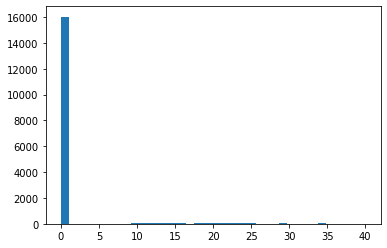

In [6]:
tool.plot_distance_distribution(lower=0,upper=40)